<a href="https://colab.research.google.com/github/afonsosr2/bootcamp_DS_Alura/blob/main/Modulo_02/Bootcamp_DS_Mod02_Aula02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bootcamp Data Science Aplicada

### **Organização:**
Alura Github: https://github.com/alura-cursos

LinkedIn: https://www.linkedin.com/school/aluracursos/

<br>

### **Resolução das aulas e desafios por:**
Afonso Augusto Rios
<br>
Email: afonsosr2@gmail.com

Github: https://github.com/afonsosr2

LinkedIn: https://www.linkedin.com/in/afonsosr2/

# Módulo 02 - Tratamento, exploração e visualização de dados

## Aula 02
*   Acompanhamento da Aula 02
*   Resolução dos Desafios



Olá, continuaremos nossas análises sobre os dados relativos à saúde no Brasil através do Bootcamp de Data Science Aplicada da Alura. 

Nesse módulo, seguiremos as análises dos dados financeiros do SUS. Inicialmente vamos focar no tratamento e manipulação dos dados para análises mais complexas, utilizando recursos mais avançados do Pandas e da Linguagem Python como um todo. 

Teremos também a inserção de dados externos que serão utilizados para enriquecer a análise exploratória e realizar comparações mais precisas entre os diferentes estados. Além disso, discutiremos mais sobre boas práticas de visualização, interpretação de gráficos e sua construção com o Seaborn.

Ao longo das aulas vou aplicar o conteúdo aprendido dentro desse curso e resolver os desafios, aproveitando também para fazer minhas próprias análises e olhando os dados de forma mais crítica. 

Nessa aula, vamos juntar tabelas que extraímos tanto do Dataframe do DATASUS quanto do Wikipédia (população em 2020) e fazer uma breve interpretação dos gastos em determinados períodos. 

Vamos começar nosso mergulho? 

### Importando a Base de Dados



Em nossa análise, vamos importar os dados do site da DATASUS disponibilizados no [link](https://datasus.saude.gov.br/informacoes-de-saude-tabnet/).

Para a Aula 02, seguiremos explorando os dados relativos aos Procedimentos Hospitalares do SUS por Unidades da Federação em alguns meses de 2020 no nosso DataFrame.

Inicialmente, vamos selecionar os dados dos Procedimentos Hospitalares do SUS levando em conta o valor total dos gastos no ano/mês de atendimento por Unidade Federativa.

In [1]:
#importando a biblioteca do Pandas para a leitura dos dados através de um arquivo .csv
import pandas as pd

dados = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/bootcamp_DS_Alura/main/dados/A111646189_28_143_208.csv", encoding="ISO-8859-1",
                    skiprows = 3, sep=";", skipfooter = 12, thousands = ".",
                    decimal = ",")

# Modificando o modo de leitura dos valores totais dos gastos.
pd.options.display.float_format = "{:.2f}".format

dados

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2306119.95,2921522.16,3300012.98,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36792954.02,36984314.60,35579251.49,35247659.30,37046350.76,34683341.17,34908420.50,29184688.30,43327731.71,40994545.21,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29
5,16 Amapá,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,1888216.67,1756846.00,1869746.50,2009211.40,2092229.29,2047927.00,2260210.72,2408659.24,2369223.52,2588154.29,2298458.18,2356798.88,2441325.03,2564176.12,2604263.92,2573615.74,2127851.77,2632890.52,2445874.82,2173060.89,2541342.33,2540183.86,2239443.36,2141400.83,2351019.41,2342718.63,2286375.90,1774558.12,2761503.37,2735248.12,2536642.73,2702550.32,2533445.46,2762003.36,2714710.93,2826612.42,2513766.36,153

### Tratando os dados para a visualização em gráfico






Agora, vamos tratar os dados para que possamos trabalhar apenas com as colunas que possuem todos os valores totais dos custos com o SUS nas Unidades da Federação.

Vamos criar um novo DataFrame que guarde esses valores para analisarmos e visualizarmos esses dados.

In [2]:
# Passando para uma variável do tipo list a posição das colunas com valores numéricos
# e colocando a Unidade de Federação na primeira coluna. 
colunas_completas = dados.mean().index.tolist()
colunas_completas.insert(0,"Unidade da Federação")

Após a criação da lista, vamos criar o nosso novo dataframe seguindo os critérios já explanados.

In [3]:
# Criando o DataFrame dados_completos com as colunas com os valores númericos completos 
# e colocando a Unidade de Federação como index.
dados_completos = dados[colunas_completas]
dados_completos = dados_completos.set_index("Unidade da Federação")

dados_completos.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2740952.07,2478349.44,

### Visualização dos dados em gráficos




Agora, vamos fazer uma breve exploração dos dados dos Procedimentos Hospitalares do SUS levando em conta o valor total dos gastos no mês de dezembro do nosso DataFrame.

Primeiro, vamos ajustar o nosso dataframe para que a visualização por gráfico fique mais fluida. Então, iremos separar os 'ids' das unidades da federação para que apareça apenas o nome dos estados, tiraremos a coluna de totais e ordenaremos os estados pelos maiores custos com o SUS no referido mês de atendimento.


In [4]:
# Separando o Id e renomeando o index só com os estados
id_uf = dados_completos.index.str.slice(stop=2)
dados_completos.index = dados_completos.index.str.slice(start=3)

# Retirando a coluna de totais e ordenando pelo maior total gasto no mês de dezembro
dados_completos = dados_completos.drop("Total", axis = 1)
dados_ordenados_total_recente = dados_completos["2020/Dez"].sort_values(ascending=False)
dados_ordenados_total_recente = dados_ordenados_total_recente / 1000000

Vamos plotar esses gastos em um gráfico de barras:

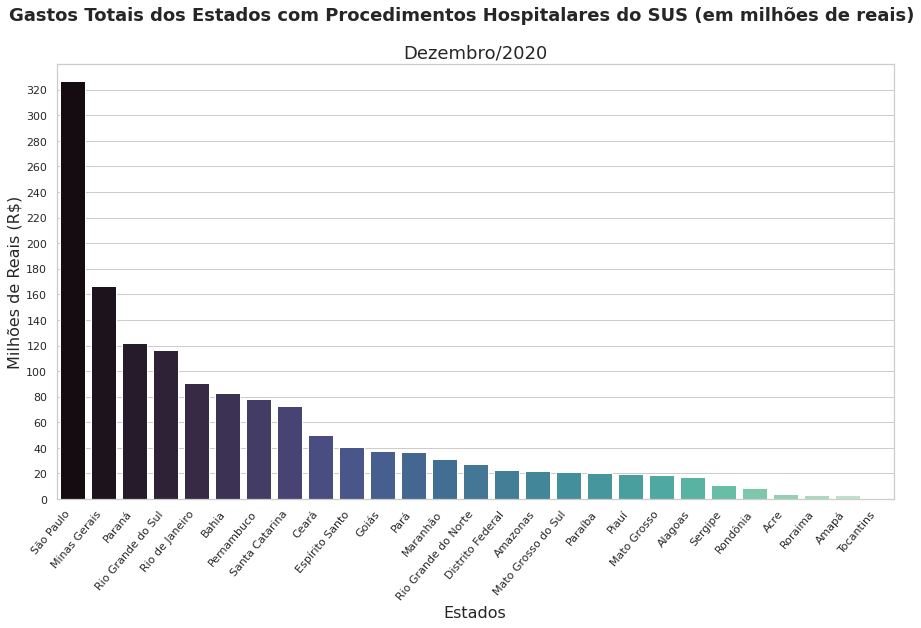

In [5]:
#Importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

# Colocando nosso gráfico para ficar com configurações adequadas para serem visualizadas
# no Jupyter Notebook e configurando o tamanho de nossa figura.
sns.set(context="notebook", style= "whitegrid") 
plt.figure(figsize=(15, 8))

# Desenhando um gráfico de barras e colocando o valor do gasto de maneira que fique mais fácil a leitura
ax = sns.barplot(x=dados_ordenados_total_recente.index, y = dados_ordenados_total_recente , palette= "mako")

# Ajustando o gráfico de 0 a 340 milhões
plt.ylim(0, 340)

# Adicionando título e subtítulo em nosso gráfico e ajustando nomeando os eixos
plt.suptitle("Gastos Totais dos Estados com Procedimentos Hospitalares do SUS (em milhões de reais)",
             size = 18, weight='bold')
plt.title("Dezembro/2020", size = 18)
plt.ylabel("Milhões de Reais (R$)", fontdict={'fontsize': 16})
plt.xlabel("Estados", fontdict={'fontsize': 16})

# Ajustando a posição das variáveis dos estados no eixo horizontal para caberem na tela corretamente e não dificultar a leitura
ax.set_xticklabels(dados_ordenados_total_recente.index, rotation=50, ha = "right")

#Ajustando o grid para 20 a 20 milhões
ax.set_yticks(range(0, 340, 20))

# Oculta as informações no topo do gráfico
plt.show()

#### Analisando os gastos per capita com o SUS em Dezembro de 2020:


Para analisarmos os gastos per capita com o SUS de todos os estados, vamos importar os dados com as estimativas populacionais em 2020 pelo Wikipédia .

E, por fim, vamos unir as duas tabelas e fazer um novo Dataframe:
1. Gastos com o SUS no mês de Dezembro de 2020
2. Estimativas das populações das Unidades Federativas

In [6]:
# Função de Limpeza e Tratamento dos dados para gerar duas tabelas (População e
# População e gastos recentes)

def retorna_tabelas_populacao_e_populacao_e_gastos_recentes(dados_gastos_recentes, url, match):
  # Lendo a tabela de Estimativas Populacionais do Wikipédia
  populacao = pd.read_html(url_dados, match=match_dados)

  # Transformando a tabela de Wikipédia em um Dataframe 
  populacao = populacao[0]

  # Adicionando as colunas de populacao e uf
  populacao["populacao"] = populacao["População"].str.replace(" ","").astype(int)
  populacao["uf"] = populacao["Unidade federativa"]

  # Criando um Dataframe só com as Unidades da Federação e suas estimativas da
  # população em 2020 e aproximando na casa dos milhões
  populacao = populacao[["populacao", "uf"]].set_index("uf")
  populacao_e_gastos_recentes = populacao.join(dados_gastos_recentes)

  return populacao, populacao_e_gastos_recentes
  
  # Criando um Dataframe com os gastos do SUS no mês de Dezembro de 2020 e as
  # estimativas das populações das Unidades Federativas




---



In [7]:
# Chamando a função para gerar as tabelas da População e População e gastos recentes (Dez/2020)
url_dados = "https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o"
match_dados = "País comparável"

# Retornando os Dataframes População e População e gastos recentes
populacao, populacao_e_gastos_recentes = retorna_tabelas_populacao_e_populacao_e_gastos_recentes(dados_ordenados_total_recente, url_dados, match_dados)

Exibindo parte das duas Tabelas: 

In [8]:
from ipywidgets import widgets, Layout
from IPython import display

populacao = pd.DataFrame(populacao)
populacao_e_gastos_recentes= pd.DataFrame(populacao_e_gastos_recentes)

# Criando widgets para receber as duas tabelas
widget1 = widgets.Output()
widget2 = widgets.Output()

# Passando tabelas para o display
with widget1:
    display.display(populacao.head())
with widget2:
    display.display(populacao_e_gastos_recentes.head())

# Adicionando alguns estilos com o CSS usando flexbox
box_layout = Layout(display='flex',
                    flex_flow='row',
                    justify_content='space-around',
                   )
    
# Criando um Box container horizontal com as duas tabelas
hbox = widgets.HBox([widget1, widget2], layout=box_layout)

# Exibindo as tabelas já organizadas com o hbox
hbox

Com o Dataframe gerado, podemos plotar o gráfico que compara todos os gastos per capita com o SUS em Dezembro de 2020, mas antes vamos adicionar duas colunas no nosso dataframe:
1. Gastos per capita por estado.
2. Gastos em reais.

In [9]:
# Função para adicionar os gastos e os gastos per capita em um determinado mês
# num dado Dataframe
def insere_gastos_e_gastos_per_capita_para(todos_os_gastos, dados, mes: str):
  gastos_do_mes = todos_os_gastos[mes]
  dados[f"gastos_{mes}"] = gastos_do_mes
  dados[f"gastos_per_capita_{mes}"] = dados[f"gastos_{mes}"] / dados["populacao"]

In [10]:
insere_gastos_e_gastos_per_capita_para(dados_completos, populacao_e_gastos_recentes, "2020/Dez")
populacao_e_gastos_recentes.drop("2020/Dez", axis=1, inplace=True)
populacao_e_gastos_recentes.head()

,populacao,gastos_2020/Dez,gastos_per_capita_2020/Dez
uf,,,
São Paulo,46289333,326846228.95,7.06
Minas Gerais,21292666,166376967.67,7.81
Rio de Janeiro,17366189,90567351.87,5.22
Bahia,14930634,83131785.74,5.57
Paraná,11516840,122146256.92,10.61


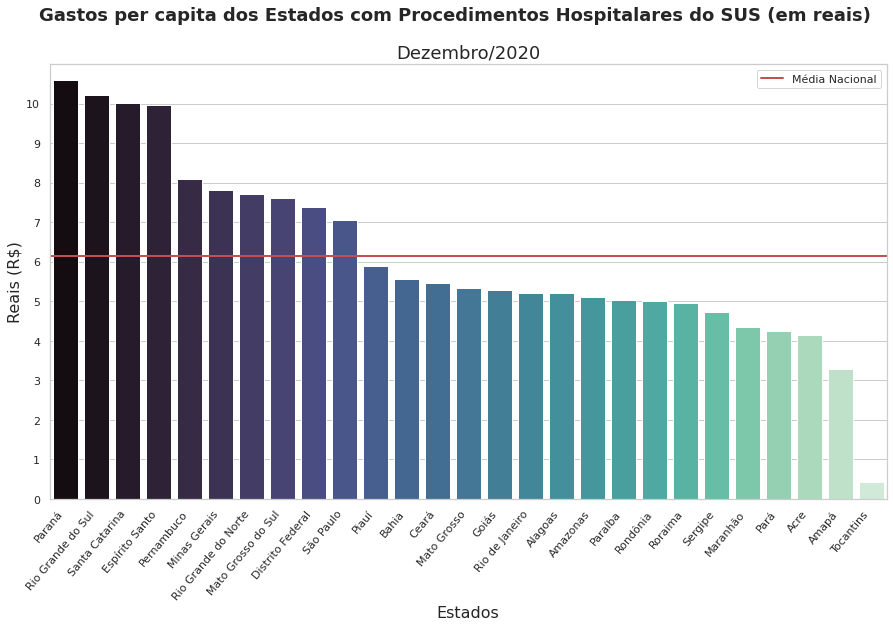

In [12]:
#Importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

# Colocando nosso gráfico para ficar com configurações adequadas para serem visualizadas
# no Jupyter Notebook e configurando o tamanho de nossa figura.
sns.set(context="notebook", style= "whitegrid") 
plt.figure(figsize=(15, 8))

# Ordenando pelo gasto per capita
populacao_e_gastos_recentes = populacao_e_gastos_recentes.sort_values("gastos_per_capita_2020/Dez", ascending= False)

# Desenhando um gráfico de barras e colocando o valor do gasto de maneira que fique mais fácil a leitura
ax = sns.barplot(data = populacao_e_gastos_recentes, x=populacao_e_gastos_recentes.index, 
                 y=populacao_e_gastos_recentes["gastos_per_capita_2020/Dez"] , palette= "mako")
ax.axhline(y= populacao_e_gastos_recentes["gastos_per_capita_2020/Dez"].mean(), linewidth=2, color='r', label="Média Nacional")

# Ajustando o gráfico de 0 a 20 reais
plt.ylim(0, 11)

# Adicionando título e subtítulo em nosso gráfico e ajustando nomeando os eixos
plt.suptitle("Gastos per capita dos Estados com Procedimentos Hospitalares do SUS (em reais)",
             size = 18, weight='bold')
plt.title("Dezembro/2020", size = 18)
plt.ylabel("Reais (R$)", fontdict={'fontsize': 16})
plt.xlabel("Estados", fontdict={'fontsize': 16})
plt.legend()

# Ajustando a posição das variáveis dos estados no eixo horizontal para caberem na tela corretamente e não dificultar a leitura
ax.set_xticklabels(populacao_e_gastos_recentes.index, rotation=50, ha = "right")

#Ajustando o grid
ax.set_yticks(range(0, 11))

# Oculta as informações no topo do gráfico
plt.show()

Neste gráfico, podemos notar que os estados da Região Sul possuiram um maior gasto per capita em relação aos estados da outra região do país e a relação de quanto maior o gasto per capita maior o número de habitantes não é possível de ser analisado por esse gráfico, portanto, vamos tentar explorar mais um pouco plotando mais gráficos relacionando os gastos totais nos últimos meses de 2020 com a população do estado e, em seguida, com os gastos per capita nos últimos meses de 2020.

#### Analisando os gastos per capita com o SUS em Dezembro e Novembro de 2020:


In [13]:
insere_gastos_e_gastos_per_capita_para(dados_completos, populacao_e_gastos_recentes, "2020/Nov")
populacao_e_gastos_recentes.head()

,populacao,gastos_2020/Dez,gastos_per_capita_2020/Dez,gastos_2020/Nov,gastos_per_capita_2020/Nov
uf,,,,,
Paraná,11516840,122146256.92,10.61,133443307.36,11.59
Rio Grande do Sul,11422973,116833971.73,10.23,116738266.69,10.22
Santa Catarina,7252502,72720675.11,10.03,79448753.69,10.95
Espírito Santo,4064052,40500910.57,9.97,35708727.33,8.79
Pernambuco,9616621,77877186.72,8.10,71810830.78,7.47


É possível notar certa relação diretamente proporcional entre o número de habitantes e os gastos dos meses de novembro e dezembro de 2020 com o SUS de cada estado. Tal relação é de certa forma esperada já que temos a hipotése de que quanto mais pessoas em um determinado local, maior seja a necessidade de atendimento em clínicas, hospitais e pronto-socorro quer seja com um a crise sanitária ou em situação normal.

Mas, esse gráfico não nos ajuda a perceber se a diferença em população também pode afetar no gasto per capita. É importante salientar que caso haja a mesma situação isso poderia nos apontar uma distribuição bem desigual de recursos. 

Para tal, vamos plotar também a relação da população com os gastos per capita de cada estado entre os meses de novembro e dezenbro de 2020.

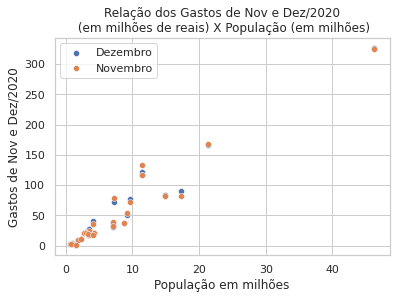

In [20]:
import seaborn as sns
figsize=(8,8)
sns.scatterplot(data= populacao_e_gastos_recentes / 1000000, x="populacao", y="gastos_2020/Dez", label="Dezembro")
sns.scatterplot(data= populacao_e_gastos_recentes / 1000000, x="populacao", y="gastos_2020/Nov", label="Novembro")
plt.title("Relação dos Gastos de Nov e Dez/2020\n (em milhões de reais) X População (em milhões)")
plt.ylabel("Gastos de Nov e Dez/2020")
plt.xlabel("População em milhões")
plt.legend()
plt.show()

Diferentemente do primeiro caso, não há visivelmente nenhuma relação entre o tamanho da população de um estado e o gasto per capita nesse estado. A hipótese de um gasto desigual relacionado ao número de habitantes dos estados não acontece necessariamente nesse caso. 

E, ainda é muito difícil colher um avanço ou recuo nos gastos dos estados, visto que os pontos de novembro e dezembro oscilam ora para cima, ora para baixo.

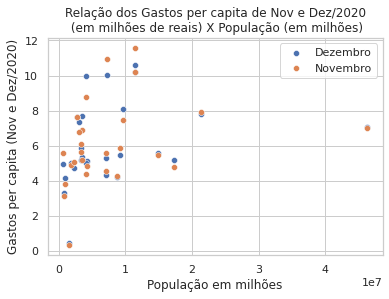

In [21]:
import seaborn as sns
figsize=(8,8)
sns.scatterplot(data=populacao_e_gastos_recentes, x="populacao", y="gastos_per_capita_2020/Dez", label="Dezembro")
sns.scatterplot(data=populacao_e_gastos_recentes, x="populacao", y="gastos_per_capita_2020/Nov", label="Novembro")
plt.title("Relação dos Gastos per capita de Nov e Dez/2020\n (em milhões de reais) X População (em milhões)")
plt.ylabel("Gastos per capita (Nov e Dez/2020)")
plt.xlabel("População em milhões")
plt.legend()
plt.show()